In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

import os
os.getcwd()


'/Users/punchh_adityas/Desktop/python/9th_oct_22/Python Assignments '

In [57]:
df = pd.read_csv("../../datasets/USA_Housing.csv")

In [58]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [60]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [61]:
# Finding outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper limit : \n", upper_limit)
print("Lower limit : \n", lower_limit)

Upper limit : 
 Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64
Lower limit : 
 Avg. Area Income                 40026.397978
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885595
Price                           287127.530937
dtype: float64


In [11]:
#  skewness and Kurtosis 


In [62]:
df.skew() # should be between -3 to 3.If its in the range then it means its normally distributed else not

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

In [63]:
df.kurtosis() # should be between -7 to 7. If its in the range then it means its normally distributed else not

Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
dtype: float64

In [13]:
# After EDA we can work on preprocrssing.
# Finding the missing value

In [64]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [15]:
# We don't have missing values. So we are good on that part

<AxesSubplot:>

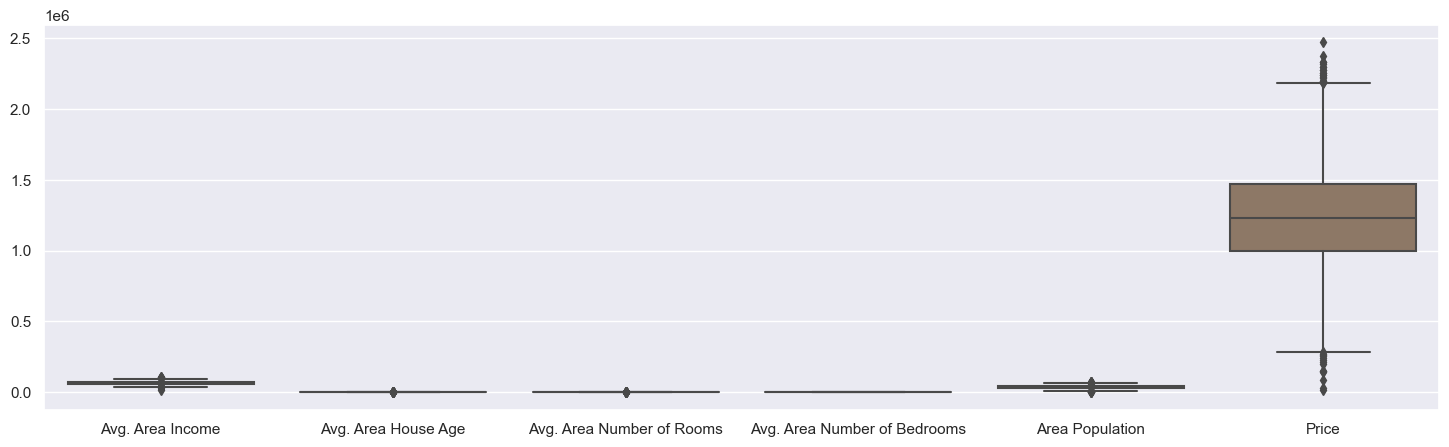

In [65]:
sns.set(rc={'figure.figsize':(18,5)}) # 
sns.boxplot(data=df)

In [ ]:
# From boxplot and IQR its clearly evidennt that Price column has outliers.

In [66]:
# Printing the values that are more than the upper limit
print(np.where(df["Price"] > 2.181660e+06))

(array([ 256,  355,  465,  622,  693,  715,  901,  924,  990, 1208, 1248,
       1485, 1516, 1536, 2300, 2538, 2719, 2795, 3502, 4129, 4400]),)


In [67]:
# Printing the values that are less than the lower limit
print(np.where(df["Price"] < 287127))

(array([  90,  263,  696, 1271, 1356, 1459, 1578, 1661, 1799, 2756, 3091,
       3212, 3922, 4451]),)


In [68]:
new_df = df.drop(df[(df.Price <= 287127) | (df.Price >= 2.181660e+06)].index)
#new_df = df[(df.Price < 287127) | (df.Price > 2.181660e+06)]
#df[(df.Price < 287127) | (df.Price > 2.181660e+06)]

In [69]:
new_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4.965000e+03
mean,68544.642807,5.975073,6.987299,3.980052,36153.075174,1.230676e+06
std,10529.850867,0.987660,1.001037,1.234641,9893.689707,3.433926e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,2.873076e+05
25%,61492.921590,5.326798,6.301235,3.140000,29404.067580,9.988556e+05
50%,68785.854740,5.969127,7.002327,4.050000,36179.405770,1.232015e+06
75%,75706.680520,6.646560,7.665602,4.490000,42803.221410,1.468030e+06
max,104702.724300,9.519088,10.280022,6.500000,69621.713380,2.180066e+06


<AxesSubplot:>

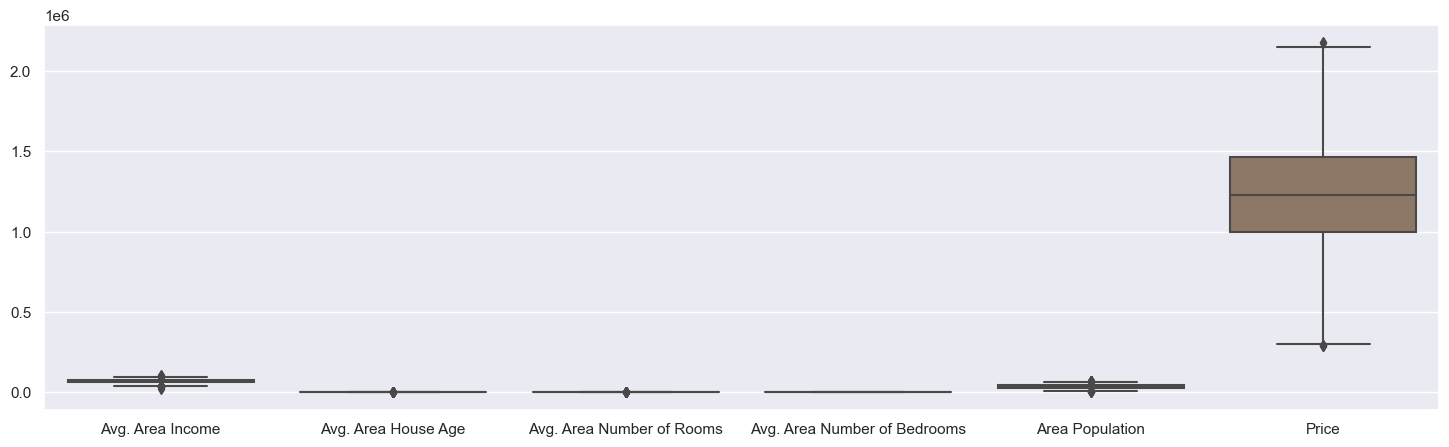

In [70]:
sns.boxplot(data=new_df)

In [71]:
new_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4.965000e+03
mean,68544.642807,5.975073,6.987299,3.980052,36153.075174,1.230676e+06
std,10529.850867,0.987660,1.001037,1.234641,9893.689707,3.433926e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,2.873076e+05
25%,61492.921590,5.326798,6.301235,3.140000,29404.067580,9.988556e+05
50%,68785.854740,5.969127,7.002327,4.050000,36179.405770,1.232015e+06
75%,75706.680520,6.646560,7.665602,4.490000,42803.221410,1.468030e+06
max,104702.724300,9.519088,10.280022,6.500000,69621.713380,2.180066e+06


In [72]:
# Finding outliers 
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper limit : \n", upper_limit)
print("Lower limit : \n", lower_limit)

Upper limit : 
 Avg. Area Income                9.702732e+04
Avg. Area House Age             8.626203e+00
Avg. Area Number of Rooms       9.712152e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.290195e+04
Price                           2.171793e+06
dtype: float64
Lower limit : 
 Avg. Area Income                 40172.283195
Avg. Area House Age                  3.347154
Avg. Area Number of Rooms            4.254685
Avg. Area Number of Bedrooms         1.115000
Area Population                   9305.336835
Price                           295093.337750
dtype: float64


<AxesSubplot:xlabel='Price', ylabel='Count'>

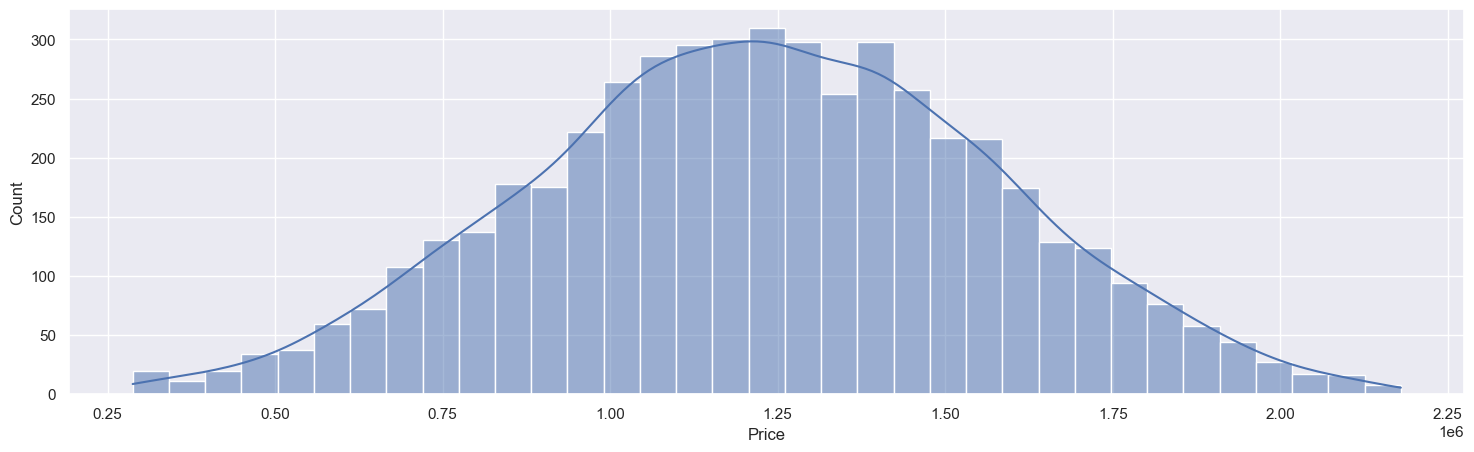

In [73]:
sns.histplot(new_df["Price"], kde=True)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Count'>

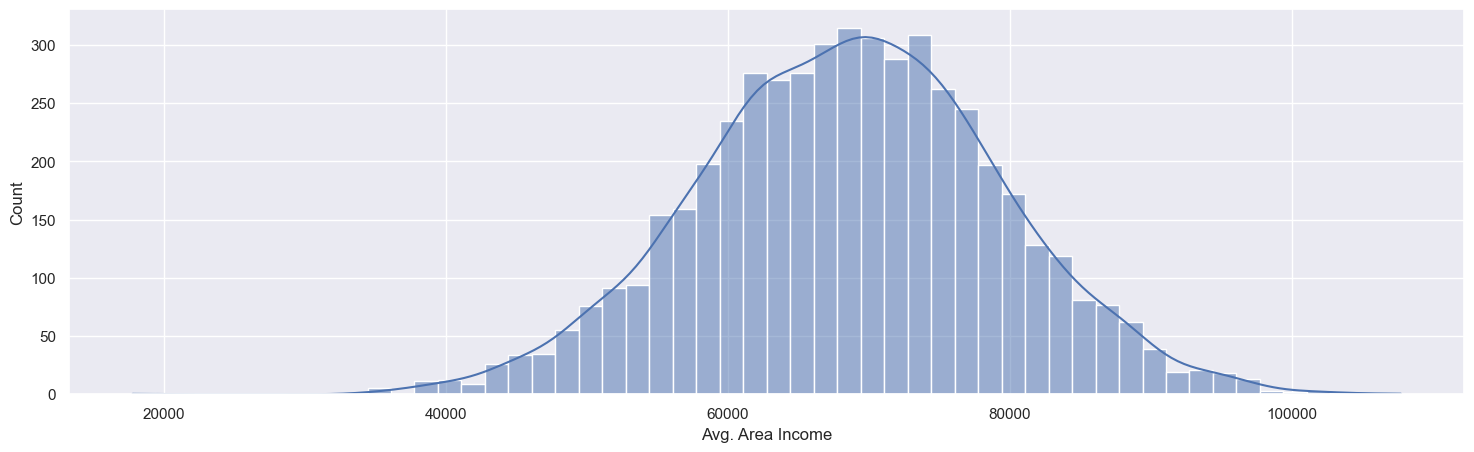

In [74]:
sns.histplot(df["Avg. Area Income"], kde=True)

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Count'>

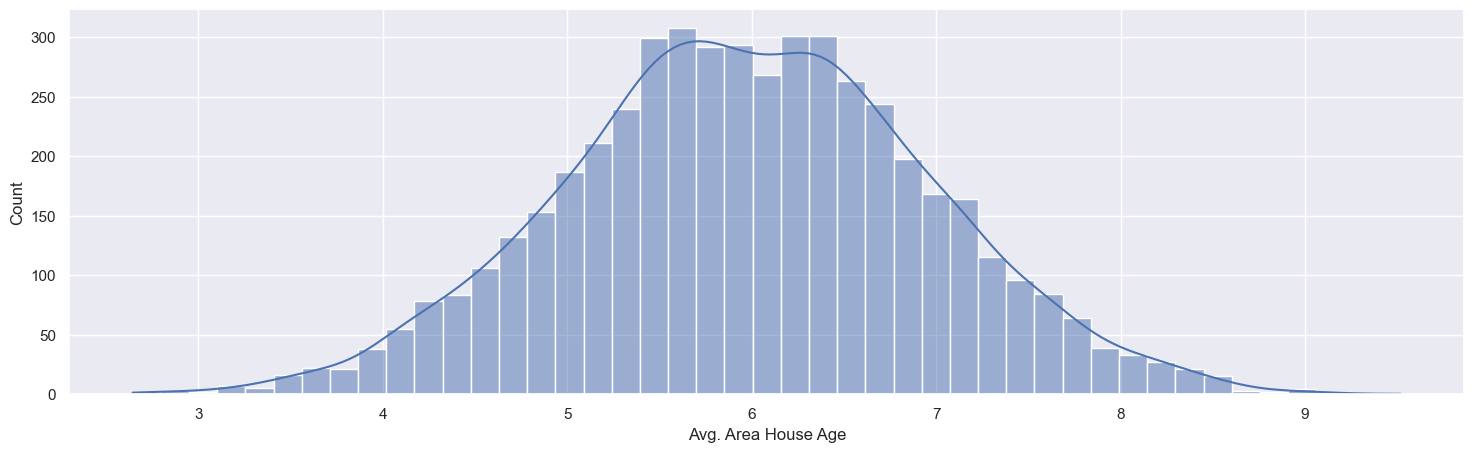

In [75]:
sns.histplot(new_df["Avg. Area House Age"], kde=True)

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Count'>

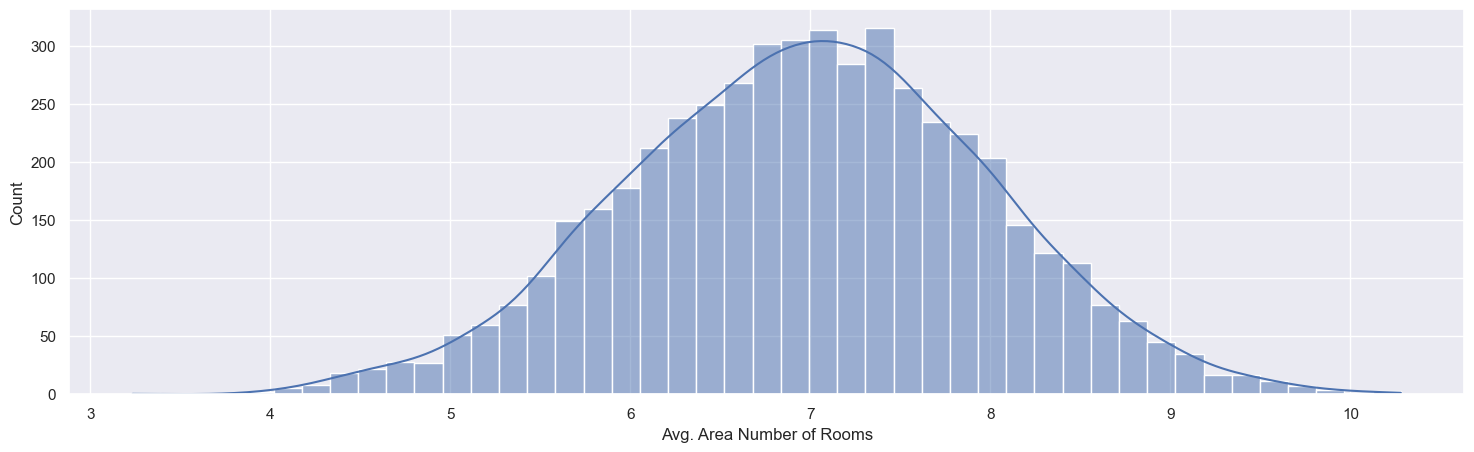

In [76]:
sns.histplot(new_df["Avg. Area Number of Rooms"], kde=True)

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Count'>

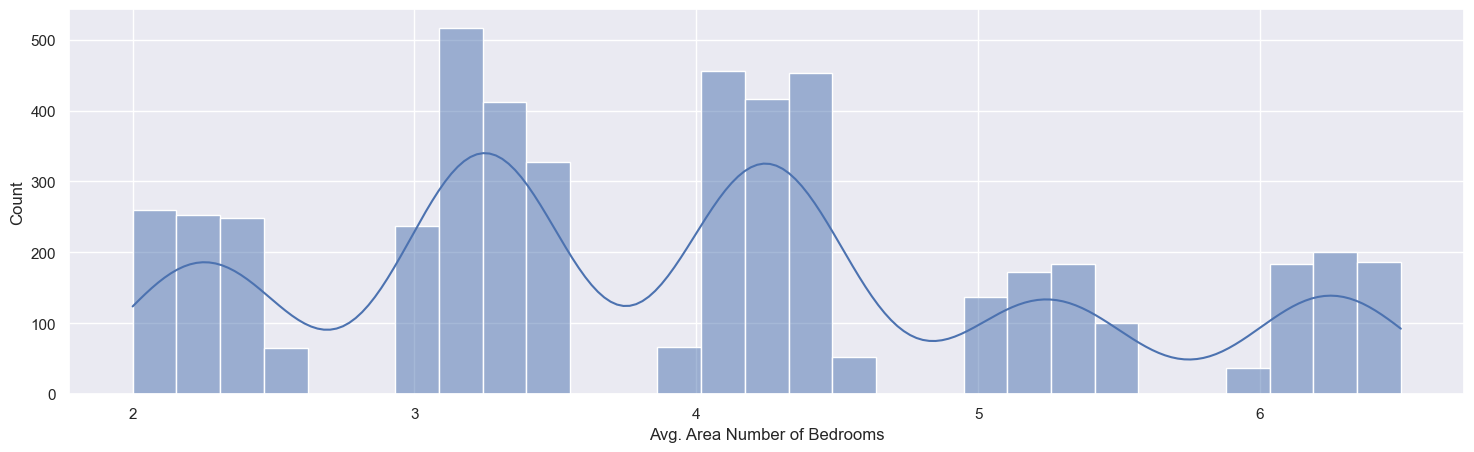

In [77]:
sns.histplot(new_df["Avg. Area Number of Bedrooms"], kde=True)

<AxesSubplot:xlabel='Area Population', ylabel='Count'>

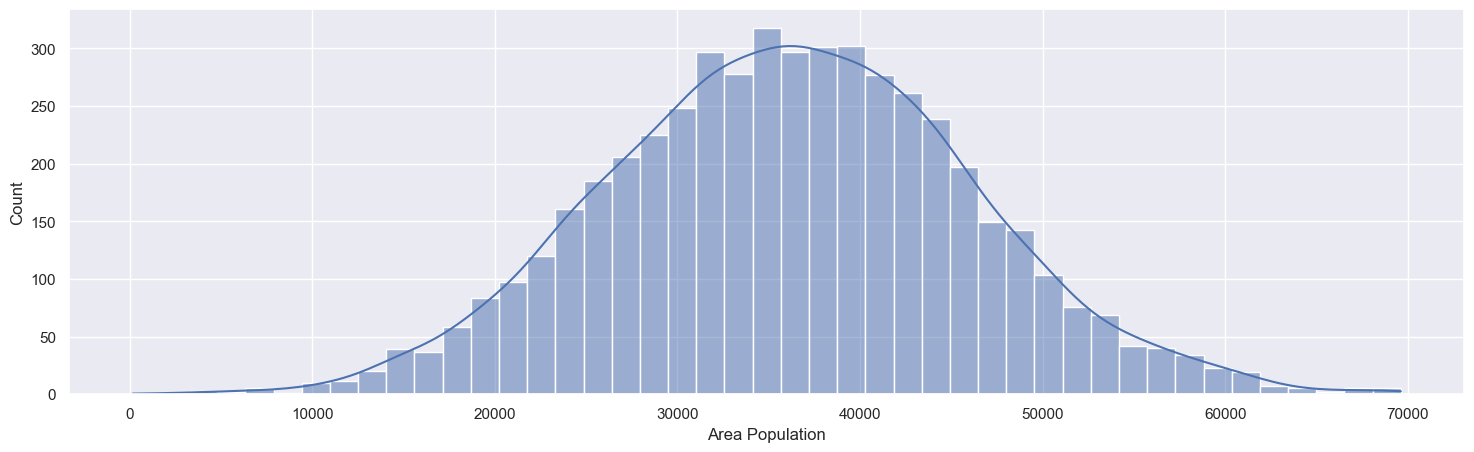

In [78]:
sns.histplot(df["Area Population"], kde=True)

In [ ]:
# Square root approach help us data tranformation towards more normality
# It also do the scaling 
# it also help outlier treatment

In [84]:
new_df = new_df.drop(["Address"], axis=1)

In [85]:
new_df = np.sqrt(new_df)

In [88]:
new_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000
mean,261.015952,2.435819,2.636413,1.970833,188.216381,1097.644097
std,20.381343,0.204619,0.191396,0.309657,26.978061,160.806595
min,133.404015,1.626132,1.798942,1.414214,13.138139,536.010806
25%,247.977663,2.307986,2.510226,1.772005,171.476143,999.427626
50%,262.270575,2.443180,2.646191,2.012461,190.208848,1109.961498
75%,275.148470,2.578092,2.768682,2.118962,206.889394,1211.623047
max,323.578003,3.085302,3.206247,2.549510,263.859268,1476.504520


In [89]:
new_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,282.038045,2.383875,2.647487,2.022375,151.943412,1029.093561
1,281.511354,2.450082,2.594383,1.757840,200.432213,1227.147471
2,247.562249,2.421960,2.917658,2.264950,192.047284,1029.071420
3,251.684803,2.681089,2.363626,1.805547,185.230243,1122.771930
4,244.912632,2.245118,2.799891,2.056696,162.339488,794.319513


In [90]:
new_df = np.sqrt(new_df)

In [91]:
new_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,16.793988,1.543980,1.627110,1.422102,12.326533,32.079488
1,16.778300,1.565274,1.610709,1.325835,14.157408,35.030665
2,15.734111,1.556265,1.708115,1.504975,13.858113,32.079143
3,15.864577,1.637403,1.537409,1.343706,13.609932,33.507789
4,15.649685,1.498372,1.673287,1.434119,12.741251,28.183675


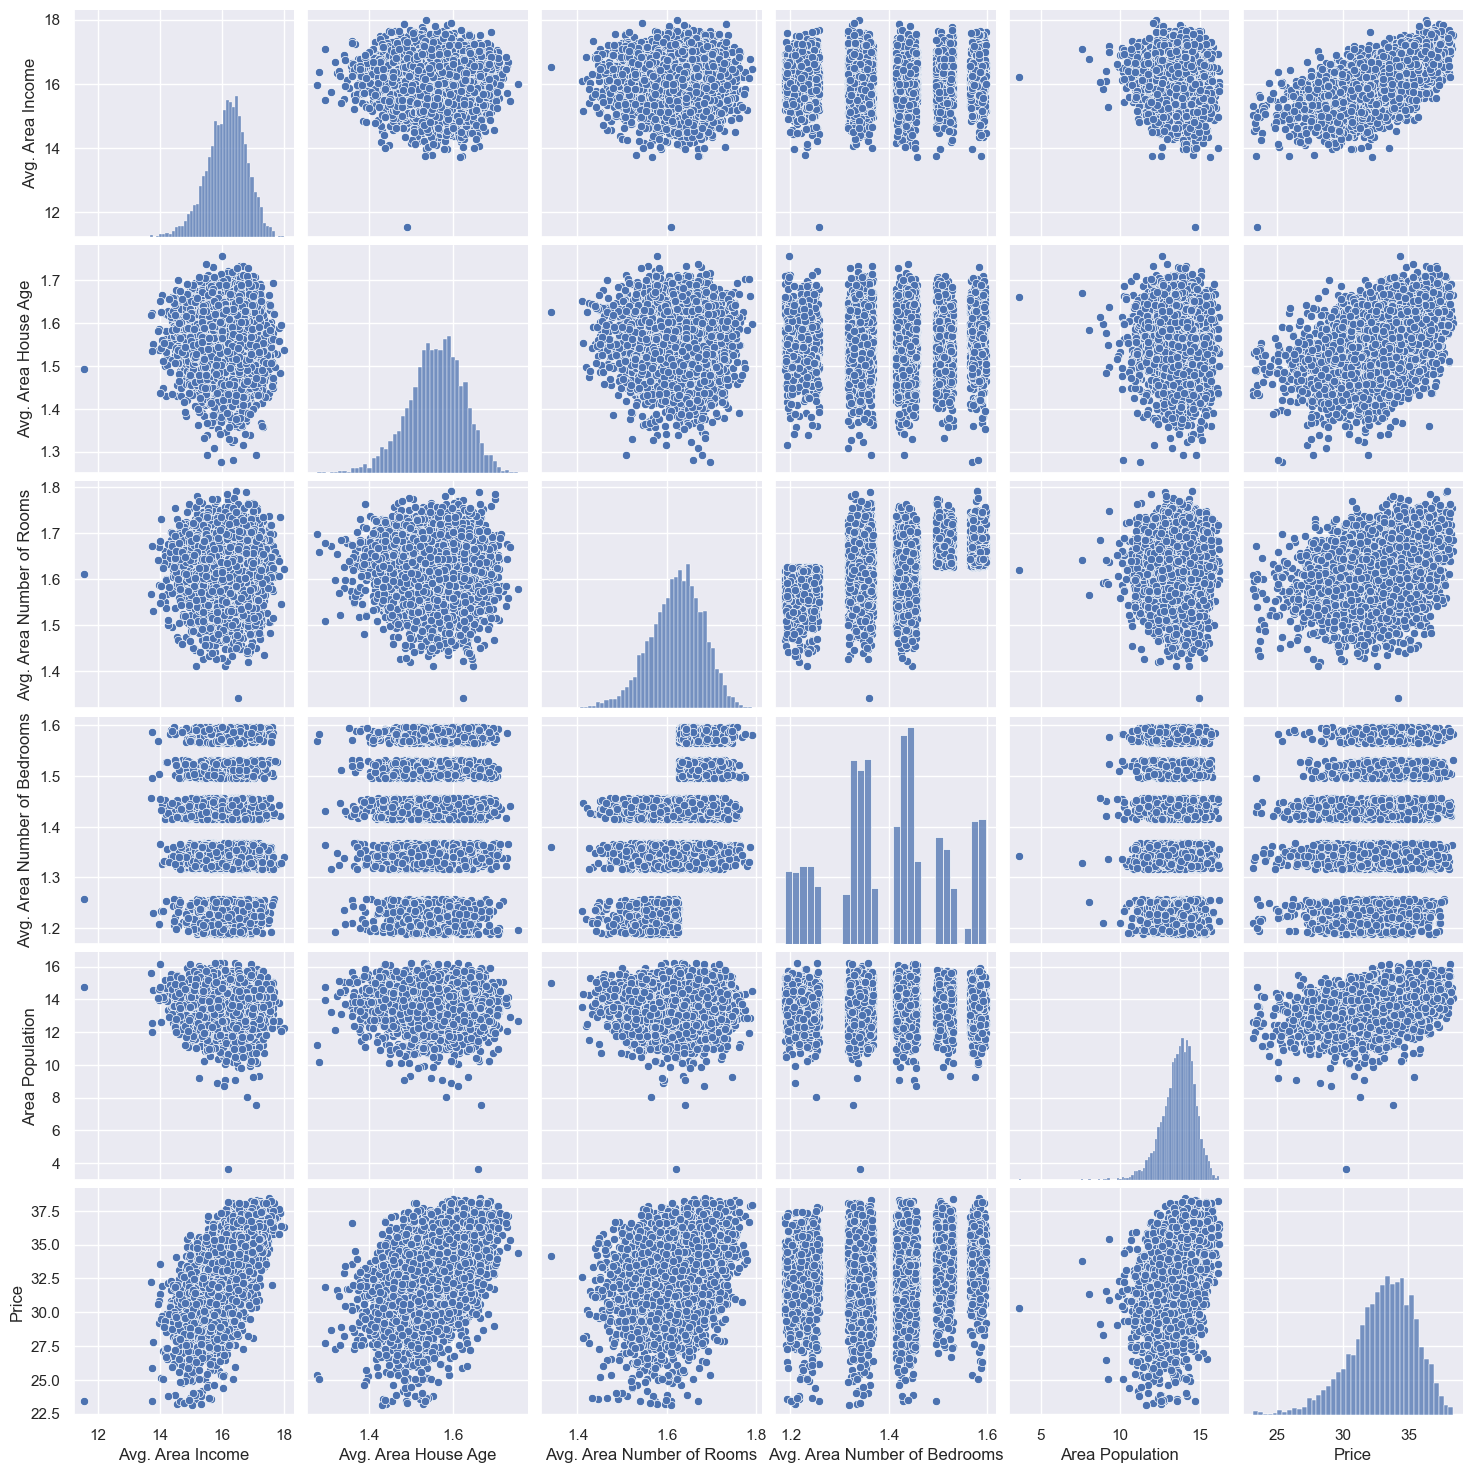

In [92]:
sns.pairplot(new_df)

In [100]:
corr = new_df.corr(method="spearman")

<AxesSubplot:>

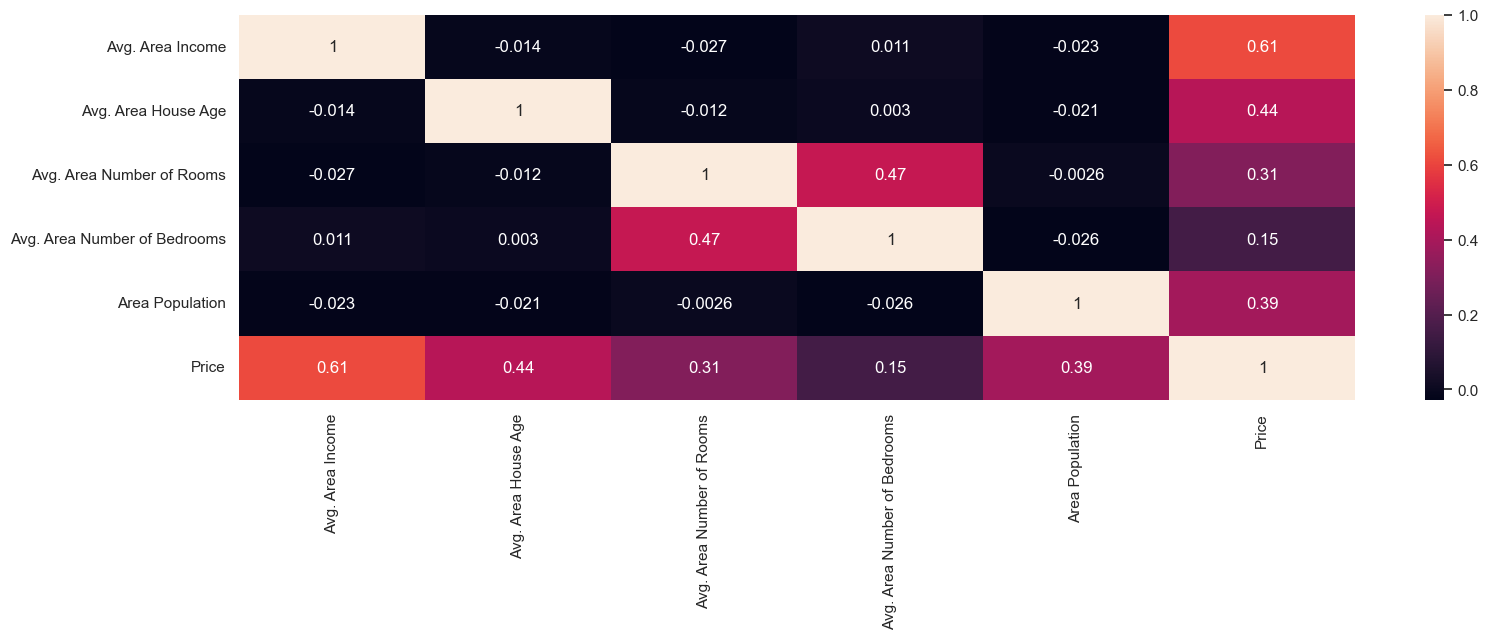

In [101]:
sns.heatmap(corr, annot=True)

In [98]:
X = new_df.drop(["Price"], axis=1)
Y = new_df["Price"]

In [99]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,16.793988,1.543980,1.627110,1.422102,12.326533
1,16.778300,1.565274,1.610709,1.325835,14.157408
2,15.734111,1.556265,1.708115,1.504975,13.858113
3,15.864577,1.637403,1.537409,1.343706,13.609932
4,15.649685,1.498372,1.673287,1.434119,12.741251


In [102]:
import statsmodels.api as sm # Required for adding a constant
X = sm.add_constant(X)

In [103]:
X.head()

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,16.793988,1.543980,1.627110,1.422102,12.326533
1,1.0,16.778300,1.565274,1.610709,1.325835,14.157408
2,1.0,15.734111,1.556265,1.708115,1.504975,13.858113
3,1.0,15.864577,1.637403,1.537409,1.343706,13.609932
4,1.0,15.649685,1.498372,1.673287,1.434119,12.741251


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.75, random_state=110)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lin_mod = LinearRegression()

In [109]:
lin_mod.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(lin_mod.intercept_)

-73.16129004621476


In [1]:
print(lin_mod.coef_)

NameError: name 'lin_mod' is not defined

In [112]:
# checking the performance of the model

In [113]:
Y_predict = lin_mod.predict(X_test)

In [114]:
print(Y_predict)

[28.61596812 34.65287519 32.32749465 ... 32.11991513 28.68320639
 33.96592273]


In [115]:
# How to evaluate the performace -- regrression model
# r2_score -- accuracy
# sum of square error
# absolute error

In [116]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

In [117]:
r2_score(Y_predict, Y_test)

0.8744294405543133

In [118]:
# Observation: our model is 87% accurate. Which is good.

In [119]:
# Lets use OLS method 

In [120]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [121]:
OLS_training = smf.OLS(Y_train, X_train)

In [122]:
OLS_training = OLS_training.fit()

In [123]:
OLS_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     5867.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:36:50   Log-Likelihood:                -4557.5
No. Observations:                3723   AIC:                             9127.
Df Residuals:                    3717   BIC:                             9164.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -73.1613      0.648   -112.837      0.000     -74.433     -71.890
Avg. Area Income                 2.5350      0.021    118.322      0.000       2.493       2.577
Avg. Area House Age             17.5108      0.204     86.008      0.000      17.112      17.910
Avg. Area Number of Rooms       14.3738      0.257     56.033      0.000      13.871      14.877
Avg. Area Number of Bedrooms     0.1522      0.138      1.107      0.268      -0.117       0.422
Area Population                  1.0559      0.013     78.483      0.000       1.030       1.082
==============================================================================
Omnibus:                      210.278   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.325
Skew:                          -0.370   Prob(JB):                    4.93e-100
Kurtosis:                       4.549   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The accuracy of this model is 88% which is good. And more over Adj. R-squared is less than R-squared.